In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the training set
df=pd.read_csv('/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [5]:
train =df.loc[:,["Open"]].values
train

array([[42120],
       [43000],
       [43940],
       ...,
       [13990],
       [13720],
       [14050]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled.shape

(1226, 1)

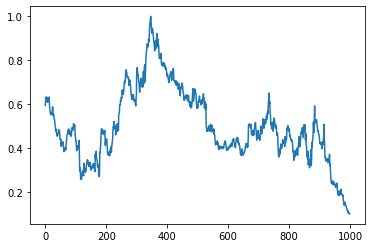

In [7]:
# train part
N=1000
plt.plot(train_scaled[:N])
plt.show()

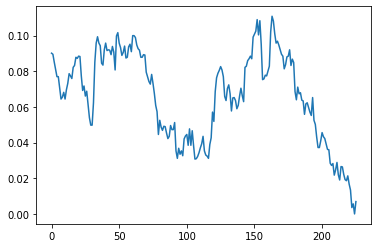

In [8]:
# we are going to predict the last 1226-N values 
plt.plot(train_scaled[N:])
plt.show()

In [15]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
Y_train = []
timesteps = 50

for i in range(timesteps,N) :
  X_train.append(train_scaled[i-timesteps:i, 0])
  Y_train.append(train_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [16]:
print('X_train shape : ', X_train.shape)
print('Y_train shape : ', Y_train.shape)

X_train shape :  (950, 50)
Y_train shape :  (950,)


In [18]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
print('X_train shape : ', X_train.shape)
print('Y_train shape : ', Y_train.shape)

X_train shape :  (950, 50, 1)
Y_train shape :  (950,)


In [20]:
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# model
model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, 1), return_sequences=True)) # 128 lstm neuron(block)
model.add(LSTM(64, return_sequences=True)) # 64 lstm neuron(block)
model.add(Dropout(0.2))
model.add(LSTM(32)) # 128 lstm neuron(block)
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))
          
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=250, batch_size=32)

Epoch 1/250
30/30 [==============================] - 9s 111ms/step - loss: 0.0166
Epoch 2/250
30/30 [==============================] - 3s 107ms/step - loss: 0.0054
Epoch 3/250
30/30 [==============================] - 3s 106ms/step - loss: 0.0041
Epoch 4/250
30/30 [==============================] - 3s 105ms/step - loss: 0.0032
Epoch 5/250
30/30 [==============================] - 3s 107ms/step - loss: 0.0031
Epoch 6/250
30/30 [==============================] - 3s 107ms/step - loss: 0.0026
Epoch 7/250
30/30 [==============================] - 3s 106ms/step - loss: 0.0024
Epoch 8/250
30/30 [==============================] - 3s 106ms/step - loss: 0.0024
Epoch 9/250
30/30 [==============================] - 3s 105ms/step - loss: 0.0025
Epoch 10/250
30/30 [==============================] - 3s 108ms/step - loss: 0.0021
Epoch 11/250
30/30 [==============================] - 3s 107ms/step - loss: 0.0021
Epoch 12/250
30/30 [==============================] - 3s 106ms/step - loss: 0.0020
Epoch 13/250


In [21]:
predicted_stock_price = []

X_test = X_train[(N-51),:]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (1,X_test.shape[0], X_test.shape[1]))
a=model.predict(X_test)
predicted_stock_price = np.append(predicted_stock_price, a)
X_test = np.append(X_test, predicted_stock_price)
X_test

array([0.23123563, 0.22935396, 0.23374451, 0.23081748, 0.21931842,
       0.23478988, 0.2314447 , 0.22140916, 0.2393895 , 0.22245453,
       0.2059377 , 0.19506586, 0.1875392 , 0.20196529, 0.19506586,
       0.18293958, 0.18670291, 0.18942087, 0.20426511, 0.19903826,
       0.18774828, 0.20259252, 0.21200084, 0.18962994, 0.18983901,
       0.18586661, 0.1875392 , 0.18043069, 0.1835668 , 0.16224127,
       0.15847794, 0.14990592, 0.13861593, 0.1436337 , 0.14802425,
       0.15304202, 0.14405185, 0.13798871, 0.13255279, 0.1308802 ,
       0.12711687, 0.11791762, 0.11645411, 0.11540874, 0.11457244,
       0.10390968, 0.1093456 , 0.10620949, 0.10202802, 0.0997282 ,
       0.10910493])

In [22]:
for i in range(1,(1226-N)):
    X_test = X_test[1:51]
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (1, 50, 1))
    a = model.predict(X_test)
    predicted_stock_price = np.append(predicted_stock_price, a)  
    X_test = np.append(X_test, predicted_stock_price[i])

In [23]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1,1))
predicted_stock_price.shape

(226, 1)

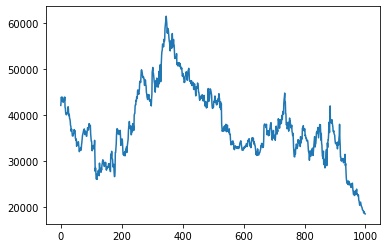

In [24]:
plt.plot(train[:N])
plt.show()

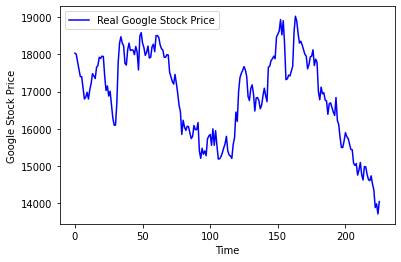

In [25]:
# we are going to predict 
plt.plot(train[N:], color = 'blue', label = 'Real Google Stock Price')
#plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


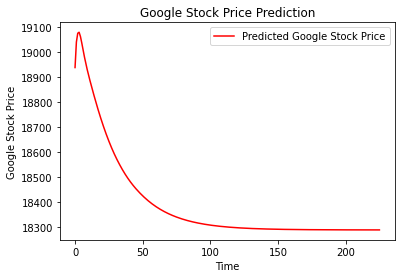

In [26]:
# Visualising the results
# plt.plot(train[1216:].reshape(-1,1), color = 'blue', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()